In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

pi = np.pi

In [2]:
c_dust = 'dimgrey'
c_core = 'tab:orange'
c_gas = 'lightgrey'
c_env = 'silver'

In [3]:
def planet(x, y, planet_type='se'):
    if planet_type=='e':
        plt.plot([x],[y],'o',color='tab:blue',ms=2)
    elif planet_type=='se':
        plt.plot([x],[y],'o',color='tab:blue',ms=4)
    elif planet_type=='n':
        plt.plot([x],[y],'o',color='tab:orange',ms=6)
    elif planet_type=='j':
        plt.plot([x],[y],'o',color='tab:orange',ms=10)

Text(0.5, 1.0, 'example: planets')

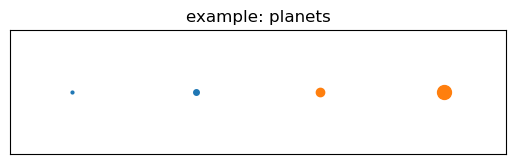

In [4]:
plt.figure()
plt.gca().set_aspect('equal', 'box')
plt.xticks([])
plt.yticks([])
planet(0,0,'e')
planet(1,0,'se')
planet(2,0,'n')
planet(3,0,'j')
plt.xlim([-.5,3.5])
plt.ylim([-.5,.5])
plt.xticks([])
plt.yticks([])
plt.title('example: planets')

In [5]:
def gas_ring(x0, y0, R_in, R_out):
    th = np.linspace(0,2*np.pi,300)
    x = np.cos(th)
    y = np.sin(th)
    x_in = x0 + R_in*x
    y_in = y0 + R_in*y
    x_out = x0 + R_out*x
    y_out = y0 + R_out*y
    plt.fill(x_out, y_out, c_gas)
    plt.fill(x_in, y_in, 'w')
R_disk_default = 5
def gas_disk(x0, y0, R_gap_in=None, R_gap_out=None, R_in=0, R_out=R_disk_default):
    if R_gap_in is None:
        gas_ring(x0, y0, R_in, R_out)
    else:
        gas_ring(x0, y0, R_gap_out, R_out)
        gas_ring(x0, y0, R_in, R_gap_in)

Text(0.5, 1.0, 'example: gas disk w/ gap')

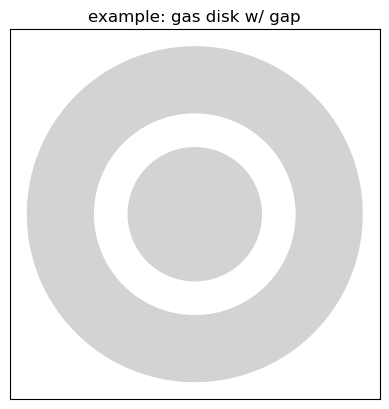

In [6]:
plt.figure()
plt.gca().set_aspect('equal', 'box')
plt.xticks([])
plt.yticks([])
gas_disk(1,1,2,3)
plt.title('example: gas disk w/ gap')

In [7]:
N0 = 50
def dust_ring(x0, y0, R_in=0, R_out=R_disk_default*.95, N=N0):
    A = R_out**2-R_in**2
    N_tot = int(N*A)
    x1 = np.random.random(N_tot)
    x2 = np.random.random(N_tot)
    R = np.sqrt(R_in**2 + x1*A)
    phi = x2*np.pi*2
    x = x0+R*np.cos(phi)
    y = y0+R*np.sin(phi)
    plt.plot(x,y,ls='',color=c_dust,marker='.',ms=3,alpha=.5,mew=0,rasterized=True)

Text(0.5, 1.0, 'example: gas disk w/ gap')

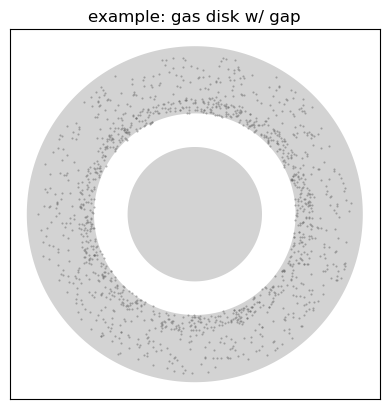

In [8]:
plt.figure()
plt.gca().set_aspect('equal', 'box')
plt.xticks([])
plt.yticks([])
gas_disk(1,1,2,3)
dust_ring(1,1,3)
dust_ring(1,1,3,3.5,4*N0)
plt.title('example: gas disk w/ gap')

In [9]:
def ini(x0, y0):
    # disk with forming planet
    gas_disk(x0,y0)
    dust_ring(x0,y0)
    planet(x0+2,y0,'e')
def se_1(x0,y0):
    # SE makes pebble gap+ring
    gas_disk(x0,y0)
    dust_ring(x0,y0,0,1.5)
    dust_ring(x0,y0,2.5)
    dust_ring(x0,y0,2.5,3,N=4*N0)
    planet(x0+2,y0,'se')
def se_2(x0,y0):
    # second core
    se_1(x0,y0)
    planet(x0+2.75,y0,'e')
def se_3(x0,y0):
    # second SE makes pebble gap+ring
    gas_disk(x0,y0)
    dust_ring(x0,y0,0,1.5)
    dust_ring(x0,y0,2.5+.75)
    dust_ring(x0,y0,2.5+.75,3+.75,N=4*N0)
    planet(x0+2,y0,'se')
    planet(x0+2+.75,y0,'se')
def se_4(x0,y0):
    gas_disk(x0,y0)
    dust_ring(x0,y0,0,1.5)
    planet(x0+2,y0,'se')
    planet(x0+2+.75,y0,'se')
    planet(x0+2+.75*2,y0,'se')
    planet(x0+2+.75*3,y0,'se')
def se_final(x0,y0):
    #plt.plot([x0-2.5,x0+2.5],[y0,y0],'k',lw=.5)
    for x in 0.75*np.linspace(-2,2,5)+x0:
        planet(x, y0, 'se')
def e_final(x0,y0):
    planet(x0, y0, 'e')

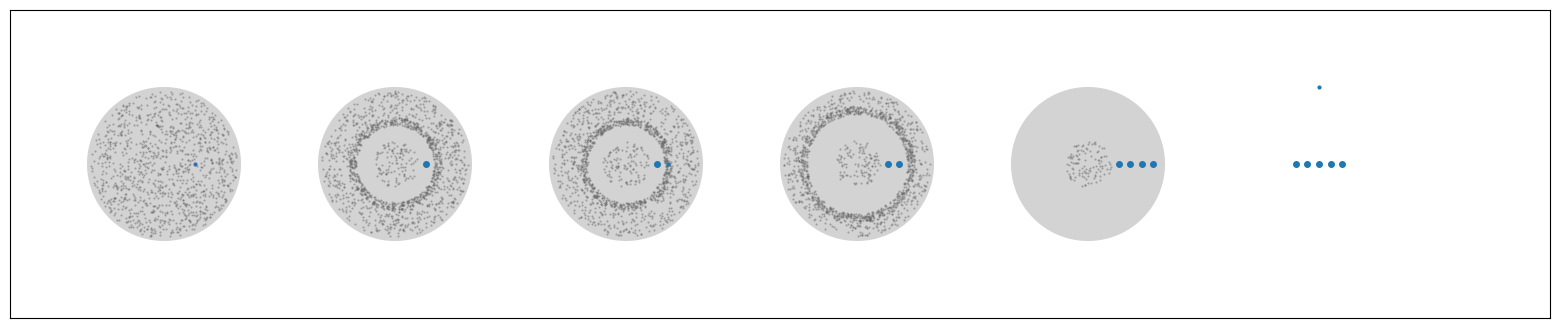

In [10]:
plt.figure(figsize=(20,4))
plt.gca().set_aspect('equal', 'box')
plt.xlim(-10,90)
plt.ylim(-10,10)
plt.xticks([])
plt.yticks([])
ini(0,0)
se_1(15,0)
se_2(30,0)
se_3(45,0)
se_4(60,0)
se_final(75,0)
e_final(75,5)

In [11]:
def jup_1(x0,y0):
    # Jup makes gas+pebble gap+ring
    r0,dr,dr2 = 2, 0.75, .5
    gas_disk(x0,y0,r0-dr,r0+dr)
    dust_ring(x0,y0,0,r0-dr)
    dust_ring(x0,y0,r0+dr)
    dust_ring(x0,y0,r0+dr,r0+dr+dr2,N=4*N0)
    planet(x0+r0,y0,'j')
def jup_2(x0,y0):
    # Jup makes gas+pebble gap+ring
    r0,dr,dr2 = 2, 0.75, .5
    gas_disk(x0,y0,r0-dr,r0+dr)
    dust_ring(x0,y0,0,r0-dr)
    dust_ring(x0,y0,r0+dr)
    dust_ring(x0,y0,r0+dr,r0+dr+dr2,N=4*N0)
    planet(x0+r0,y0,'j')
    planet(x0+r0+dr+dr2/2,y0,'se')
def jup_3(x0,y0):
    # opens joint gap
    r0,dr,dr2 = 2, 0.75, .5
    dr3 = dr+dr2/2
    gas_disk(x0,y0,r0-dr,r0+dr+dr3)
    dust_ring(x0,y0,0,r0-dr)
    dust_ring(x0,y0,r0+dr+dr3)
    dust_ring(x0,y0,r0+dr+dr3,r0+dr+dr2+dr3,N=4*N0)
    planet(x0+r0,y0,'j')
    planet(x0+r0+dr+dr2/2,y0,'j')
def plot_orbit(x0,y0,a,e,omega,lam):
    # get orbit
    phi = np.linspace(0,2*pi,300)
    r = a*(1-e**2)/(1+e*np.cos(phi))
    rp = a*(1-e**2)/(1+e*np.cos(lam))
    x = r*np.cos(phi)
    y = r*np.sin(phi)
    xp = rp*np.cos(lam)
    yp = rp*np.sin(lam)
    # rotate by omega
    x, y = x*np.cos(omega)-y*np.sin(omega), x*np.sin(omega)+y*np.cos(omega)
    xp, yp = xp*np.cos(omega)-yp*np.sin(omega), xp*np.sin(omega)+yp*np.cos(omega)
    # offset by x0,y0
    x, y = x+x0, y+y0
    xp,yp = xp+x0, yp+y0
    plt.plot(x,y,'k',lw=.5)
    return xp, yp
def jup_4(x0,y0):
    # instability
    r0,dr,dr2 = 2, 0.75, 1
    dr3 = dr+dr2/2
    gas_disk(x0,y0,r0-dr,r0+dr+dr3)
    dust_ring(x0,y0,0,r0-dr)
    dust_ring(x0,y0,r0+dr+dr3)
    xp,yp = plot_orbit(x0,y0,2,0.3,1,2)
    planet(xp,yp,'j')
    xp,yp = plot_orbit(x0,y0,3,0.3,-.5,1)
    planet(xp,yp,'j')
def jup_final(x0,y0):
    planet(x0, y0+1.5, 'j')
    planet(x0-.75, y0-1.5, 'j')
    planet(x0+.75, y0-1.5, 'j')
def jup_final_2(x0,y0):
    #plt.plot([x0-2.5,x0+2.5],[y0,y0],'k',lw=.5)
    for x in 1.5*np.linspace(-1,1,3)+x0:
        planet(x, y0, 'j')
def jup_final_3(x0,y0):
    #plt.plot([x0-2.5,x0+2.5],[y0,y0],'k',lw=.5)
    for x in 1.5*np.linspace(-.75,.75,2)+x0:
        planet(x, y0, 'j')
def n_final(x0,y0):
    planet(x0, y0, 'n')

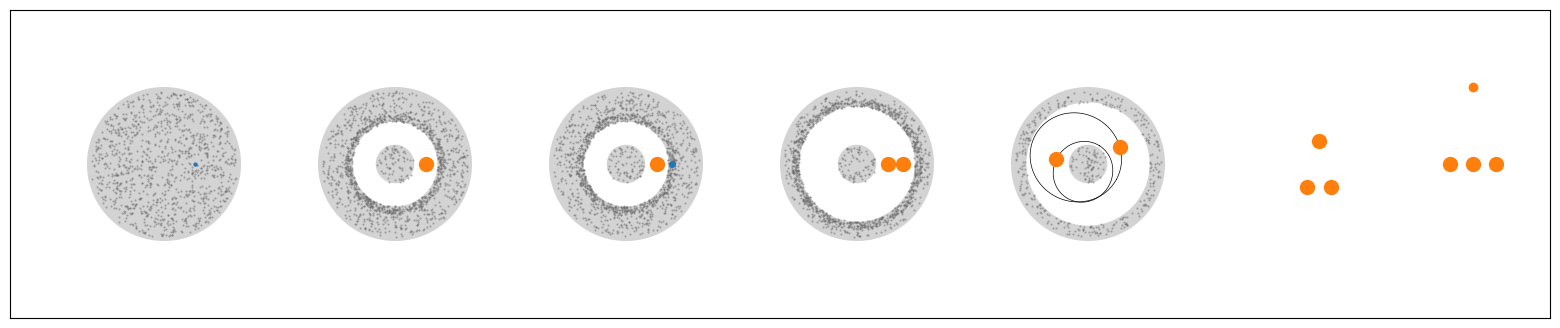

In [12]:
plt.figure(figsize=(20,4))
plt.gca().set_aspect('equal', 'box')
plt.xlim(-10,90)
plt.ylim(-10,10)
plt.xticks([])
plt.yticks([])
ini(0,0)
jup_1(15,0)
jup_2(30,0)
jup_3(45,0)
jup_4(60,0)
jup_final(75,0)
jup_final_2(85,0)
n_final(85,5)

In [13]:
def make_figure():
    plt.figure(figsize=(2,2))
    plt.xticks([])
    plt.yticks([])
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.axis('off')
    plt.tight_layout()

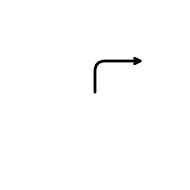

In [14]:
make_figure()
import matplotlib
a = matplotlib.patches.FancyArrowPatch((0,0),(3,2),lw=2,arrowstyle='->',connectionstyle="angle,angleA=90,angleB=0,rad=10",mutation_scale=10)
plt.gca().add_patch(a)

In [15]:
def arrow(x1,y1,x2,y2,style='h',arrowstyle='->'):
    if x1!=x2 and y1!=y2:
        if style=='h':
            connectionstyle="angle,angleA=0,angleB=90"
        elif style=='v':
            connectionstyle="angle,angleA=90,angleB=0"
        connectionstyle+=",rad=10"
    else:
        connectionstyle="arc3"
    a = matplotlib.patches.FancyArrowPatch((x1,y1),(x2,y2),lw=2,arrowstyle=arrowstyle,connectionstyle=connectionstyle,mutation_scale=10)
    plt.gca().add_patch(a)
def simple_arrow(x,y):
    l = 3
    a = matplotlib.patches.FancyArrowPatch((x-l/2,y),(x+l/2,y),arrowstyle='->',lw=2,mutation_scale=10)
    plt.gca().add_patch(a)

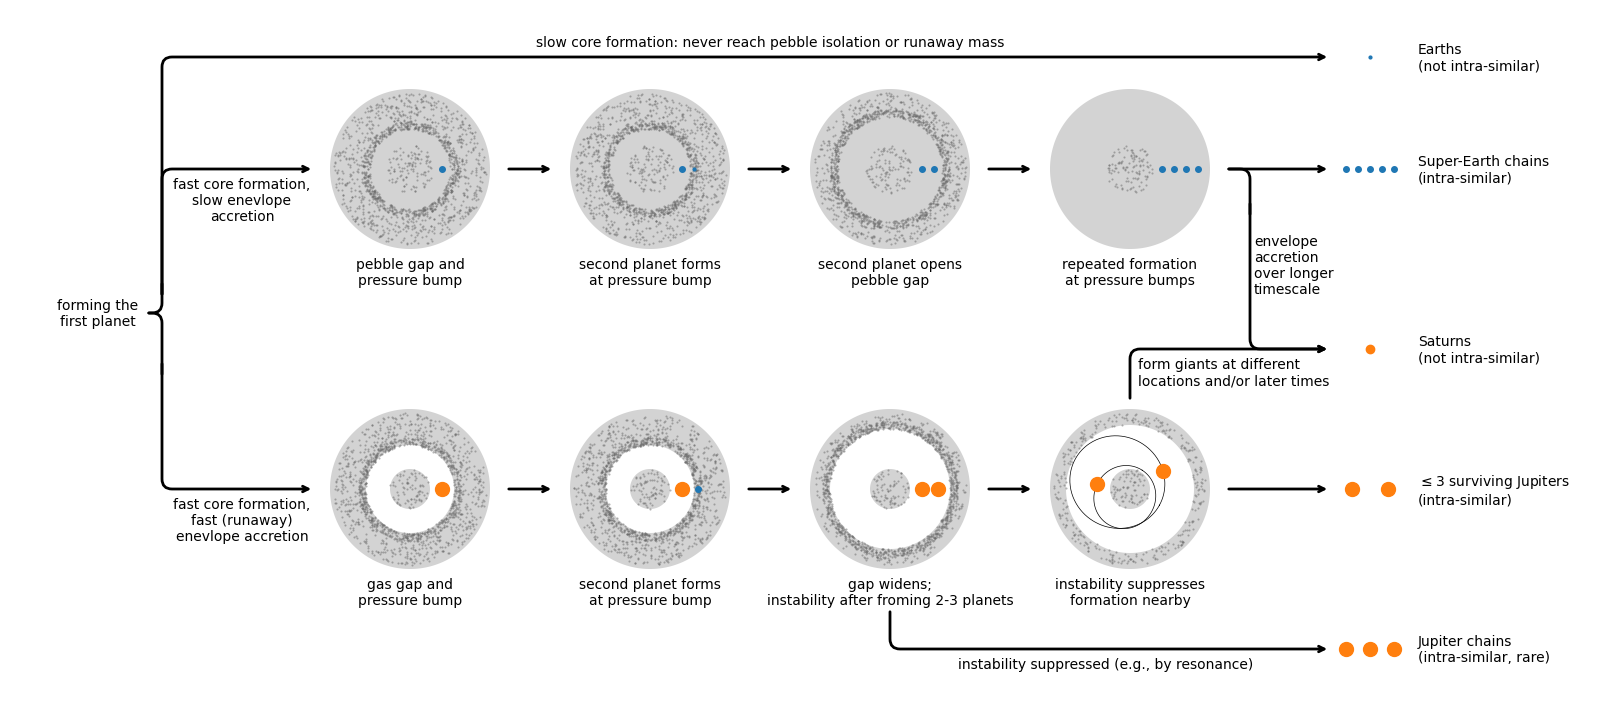

In [16]:
xl = (-10,90)
yl = (-23,20)
s = 0.16
fig=plt.figure(figsize=((xl[1]-xl[0])*s,(yl[1]-yl[0])*s))
fig.add_axes([0,0,1,1])
plt.gca().set_aspect('equal', 'box')
plt.xlim(xl)
plt.ylim(yl)
plt.xticks([])
plt.yticks([])

dx = 15
dy = 10
dyt = -5.5

def text(x,y,t,ha='center',va='top'):
    plt.text(x,y,t,ha=ha,va=va)

se_1(dx,dy)
text(dx,dy+dyt,'pebble gap and\npressure bump')
simple_arrow(dx*1.5,dy)
se_2(dx*2,dy)
text(dx*2,dy+dyt,'second planet forms\nat pressure bump')
simple_arrow(dx*2.5,dy)
se_3(dx*3,dy)
text(dx*3,dy+dyt,'second planet opens\npebble gap')
simple_arrow(dx*3.5,dy)
se_4(dx*4,dy)
text(dx*4,dy+dyt,'repeated formation\nat pressure bumps')
arrow(dx*4.5-1.5,dy,dx*4.5+5,dy)
se_final(dx*5,dy)
text(dx*5+3,dy,'Super-Earth chains\n(intra-similar)',va='center',ha='left')

e_final(dx*5,dy+7)
arrow(-.5, 2, dx*4.5+5, dy+7, style='v')
text(dx*5+3,dy+7,'Earths\n(not intra-similar)',va='center',ha='left')
text(dx*2.5, dy+7.5, 'slow core formation: never reach pebble isolation or runaway mass', va='bottom')

arrow(-.5, 2, dx*.5+1.5, dy, style='v')
text(dx*.25+.75, dy-.5, 'fast core formation,\nslow enevlope\naccretion')

jup_1(dx,-dy)
text(dx,-dy+dyt,'gas gap and\npressure bump')
simple_arrow(dx*1.5,-dy)
jup_2(dx*2,-dy)
text(dx*2,-dy+dyt,'second planet forms\nat pressure bump')
simple_arrow(dx*2.5,-dy)
jup_3(dx*3,-dy)
text(dx*3,-dy+dyt,'gap widens;\ninstability after froming 2-3 planets')
simple_arrow(dx*3.5,-dy)
jup_4(dx*4,-dy)
text(dx*4,-dy+dyt,'instability suppresses\nformation nearby')
arrow(dx*4.5-1.5,-dy,dx*4.5+5,-dy,style='v')
jup_final_3(dx*5,-dy)
text(dx*5+3,-dy,r'$\leq 3$'+' surviving Jupiters\n(intra-similar)',va='center',ha='left')

arrow(dx*3,-dy*2+2.5,dx*4.5+5,-dy*2,style='v')
jup_final_2(dx*5, -dy*2)
text(dx*5+3,-dy*2,'Jupiter chains\n(intra-similar, rare)',va='center',ha='left')
text(dx*4-1.5, -dy*2-0.5, 'instability suppressed (e.g., by resonance)',va='top')

arrow(-.5, -2, dx*.5+1.5, -dy, style='v')
text(dx*.25+.75, -dy-.5, 'fast core formation,\nfast (runaway)\nenevlope accretion')

arrow(-1.5, 1, -.5, 3, arrowstyle='-')
arrow(-1.5, 1, -.5, -3, arrowstyle='-')
text(-4.5,1,'forming the\nfirst planet',va='center')

arrow(dx*4.5, dy-2, dx*4.5+5, -1.25, style='v')
arrow(dx*4.5-1.5, dy, dx*4.5, dy-3, arrowstyle='-')
arrow(dx*4, -dy+5.5, dx*4.5+5, -1.25, style='v')
text(dx*4+.5, -1.25-.5, 'form giants at different\nlocations and/or later times', ha='left')
text(dx*4.5+.25, dy*.5-1, 'envelope\naccretion\nover longer\ntimescale', va='center', ha='left')

n_final(dx*5,-1.25)
text(dx*5+3,-1.25,'Saturns\n(not intra-similar)',va='center',ha='left')

plt.axis('off')
#plt.savefig('figures/diagram.pdf')
plt.show()